# **PHASE 3 PROJECT** 


### **Final Project Submission**
Please fill out:

Student name: Alex Irungu

Group: GROUP 1

Student pace: PART TIME 

Scheduled project review date/time: PHASE 3

Instructor name: SAMUEL KARU

## 1. Business Problem and Stakeholder

Our stakeholder is the city police department leadership. They want to understand what factors contribute to arrests following Terry Stops, with the goal of improving police practices and community relations

We aim to build a classifier to predict whether an arrest was made after a Terry Stop, using various features including time of day, presence of weapons, and potentially sensitive information like race and gender.

## 2. Data Loading and Exploration

In [7]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer


In [8]:
# Load the data
df = pd.read_csv('Terry_Stops_20240827.csv')

In [9]:
# Display first few rows and basic information about the dataset
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,7732696346,20190000315233,9803669705,Field Contact,-,4161,1957,M,American Indian/Alaska Native,...,10:47:39.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 1ST W - KING - PLATOON 1,N,N,West,K,K2
1,46 - 55,8295859194,20190000207006,8299762394,Arrest,-,6404,1971,M,White,...,17:08:12.0000000,BURG - OCCUPIED RESD,--PROPERTY DEST (DAMG),911,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,Y,N,North,N,N3
2,26 - 35,-1,20170000002886,467843,Field Contact,NaN,7430,1984,F,White,...,17:48:00.0000000,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,Y,-,-,-
3,1 - 17,-1,20180000275743,472723,Offense Report,NaN,5151,1962,M,White,...,11:49:00.0000000,-,-,-,SOUTHWEST PCT 1ST W - WILLIAM - PLATOON 2,N,N,Southwest,F,F1
4,36 - 45,16227498273,20220000263279,37099192062,Arrest,-,7655,1982,M,Nat Hawaiian/Oth Pac Islander,...,22:18:36.0000000,SHOPLIFT - THEFT,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,ONVIEW,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,Southwest,F,F2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61021 entries, 0 to 61020
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61021 non-null  object
 1   Subject ID                61021 non-null  int64 
 2   GO / SC Num               61021 non-null  int64 
 3   Terry Stop ID             61021 non-null  int64 
 4   Stop Resolution           61021 non-null  object
 5   Weapon Type               28456 non-null  object
 6   Officer ID                61021 non-null  object
 7   Officer YOB               61021 non-null  int64 
 8   Officer Gender            61021 non-null  object
 9   Officer Race              61021 non-null  object
 10  Subject Perceived Race    61021 non-null  object
 11  Subject Perceived Gender  61021 non-null  object
 12  Reported Date             61021 non-null  object
 13  Reported Time             61021 non-null  object
 14  Initial Call Type     

## Data Exploration

In [11]:
# check the distribution of the target variable (Arrest Flag)
print(df['Arrest Flag'].value_counts(normalize=True))

Arrest Flag
N    0.892086
Y    0.107914
Name: proportion, dtype: float64


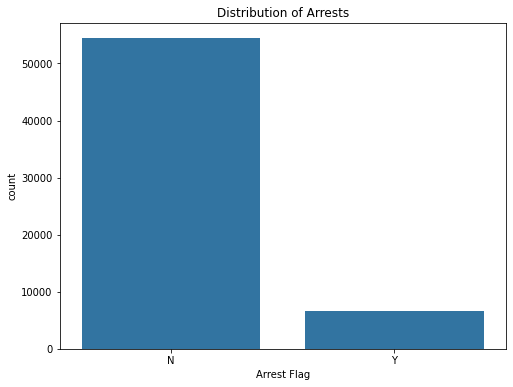

In [12]:
# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Arrest Flag', data=df)
plt.title('Distribution of Arrests')
plt.show()

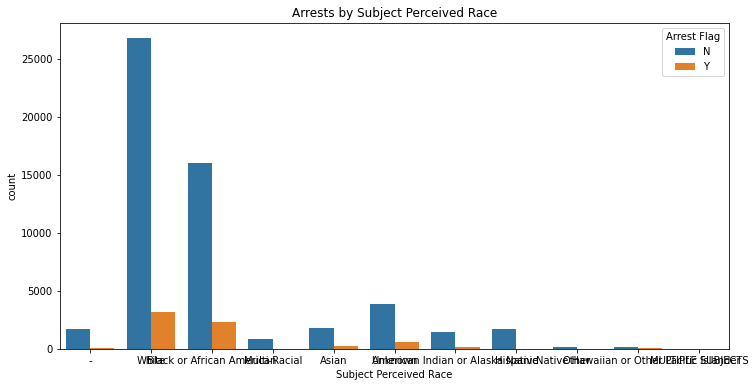

In [14]:
# Examine the relationship between subject perceived race and arrest flag
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject Perceived Race', hue='Arrest Flag', data=df)
plt.title('Arrests by Subject Perceived Race')
plt.show()